In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
boston = pd.read_csv('housing.csv')

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [10]:
boston.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [11]:
boston.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

## EDA

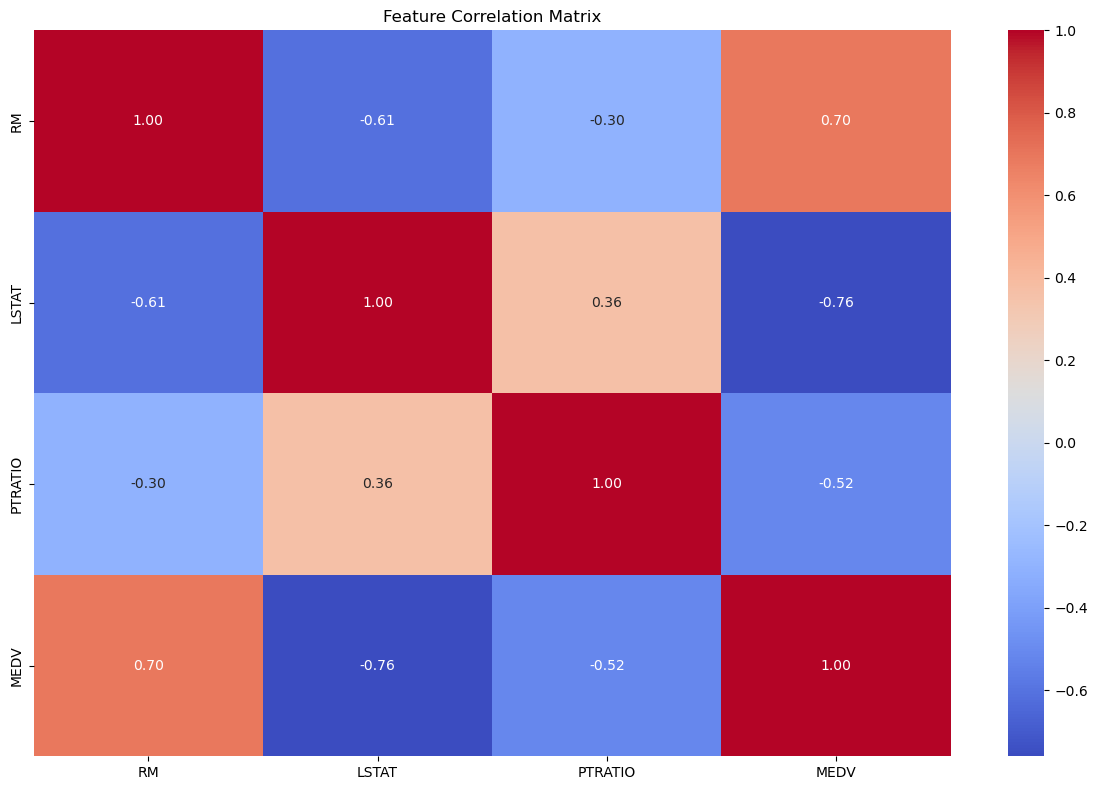

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

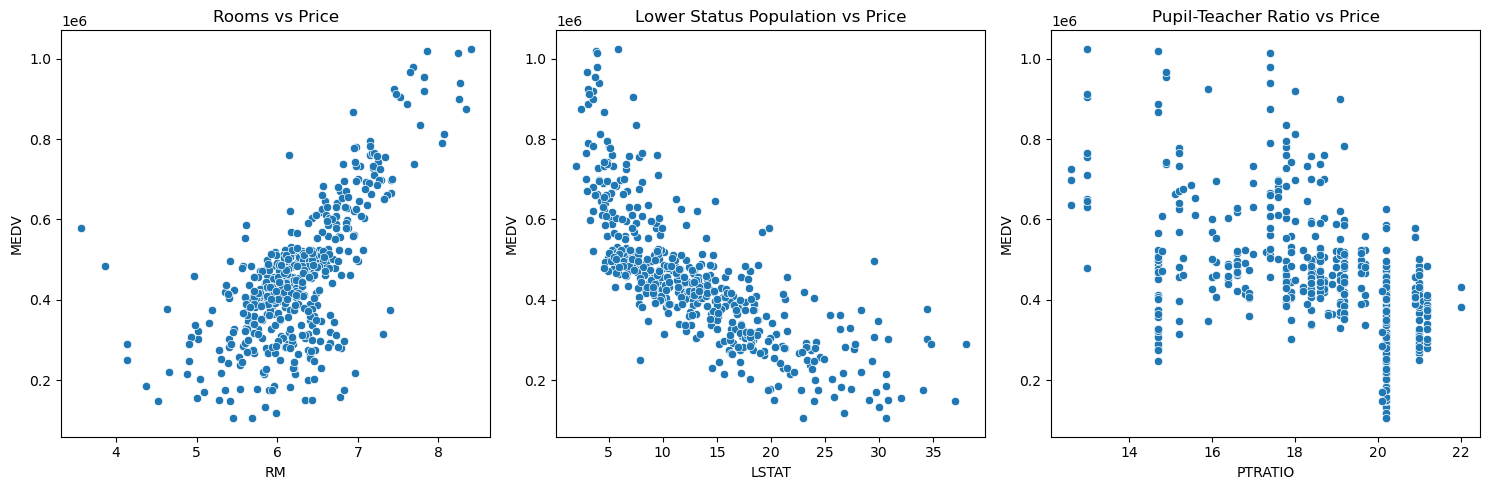

In [16]:
# 각 특성과 주택 가격의 산점도
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RM vs MEDV
sns.scatterplot(data=boston, x='RM', y='MEDV', ax=axes[0])
axes[0].set_title('Rooms vs Price')

# LSTAT vs MEDV
sns.scatterplot(data=boston, x='LSTAT', y='MEDV', ax=axes[1])
axes[1].set_title('Lower Status Population vs Price')

# PTRATIO vs MEDV
sns.scatterplot(data=boston, x='PTRATIO', y='MEDV', ax=axes[2])
axes[2].set_title('Pupil-Teacher Ratio vs Price')

plt.tight_layout()
plt.show()

## 데이터 전처리

In [18]:
x = boston.drop('MEDV', axis = 1)
y = boston['MEDV']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 모델 학습 및 평가

In [21]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

y_pred = lr_model.predict(x_test_scaled)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
print("\n===모델 성능 평가 ===")
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')


===모델 성능 평가 ===
RMSE: 82395.54
R2 Score: 0.69


In [25]:
## 교차 검증
cv_scores = cross_val_score(lr_model, x_train_scaled, y_train, cv=5, scoring='r2')
print(f'\n 교차 검증 R2 scores: {cv_scores}')
print(f'평균 R2 score: {cv_scores.mean():.2f}')


 교차 검증 R2 scores: [0.71643886 0.65124824 0.65220223 0.75240275 0.77859073]
평균 R2 score: 0.71
